# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)
8. [Objetivo](#obj)
9. [Instrucciones](#instr)
10. [Desarrollo](#desarr)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


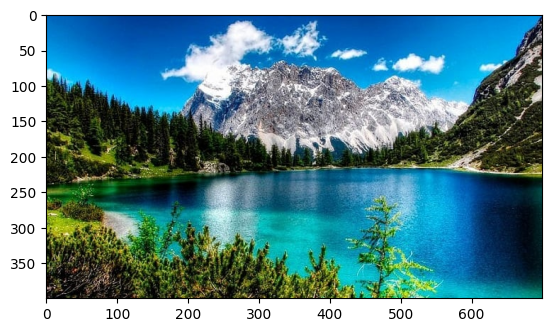

In [ ]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [ ]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

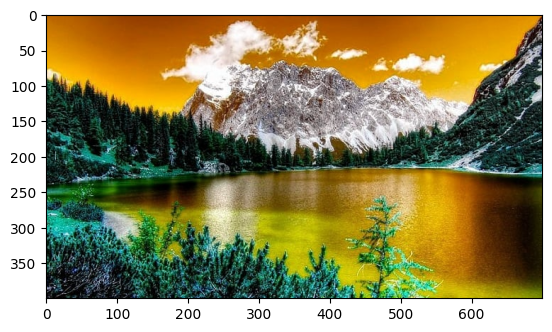

In [ ]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(size=(400, 700))


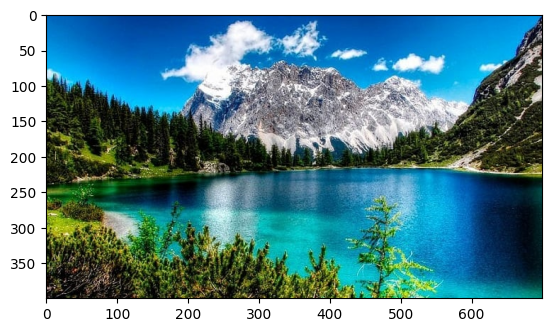

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


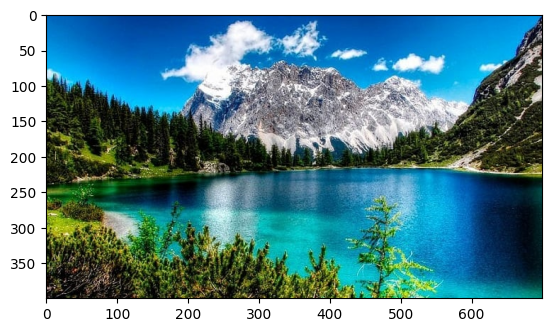

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(400, 700, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

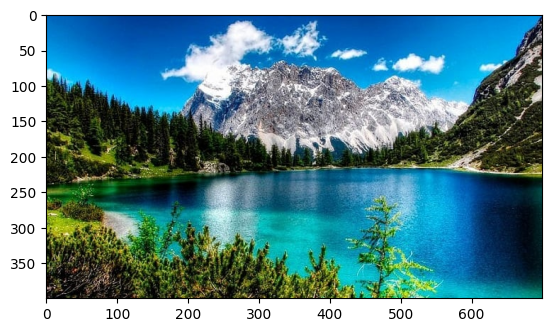

In [ ]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('/content/drive/MyDrive/computer-vision-course/RepoGithub/data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 700 x 400
New size: 200 x 200


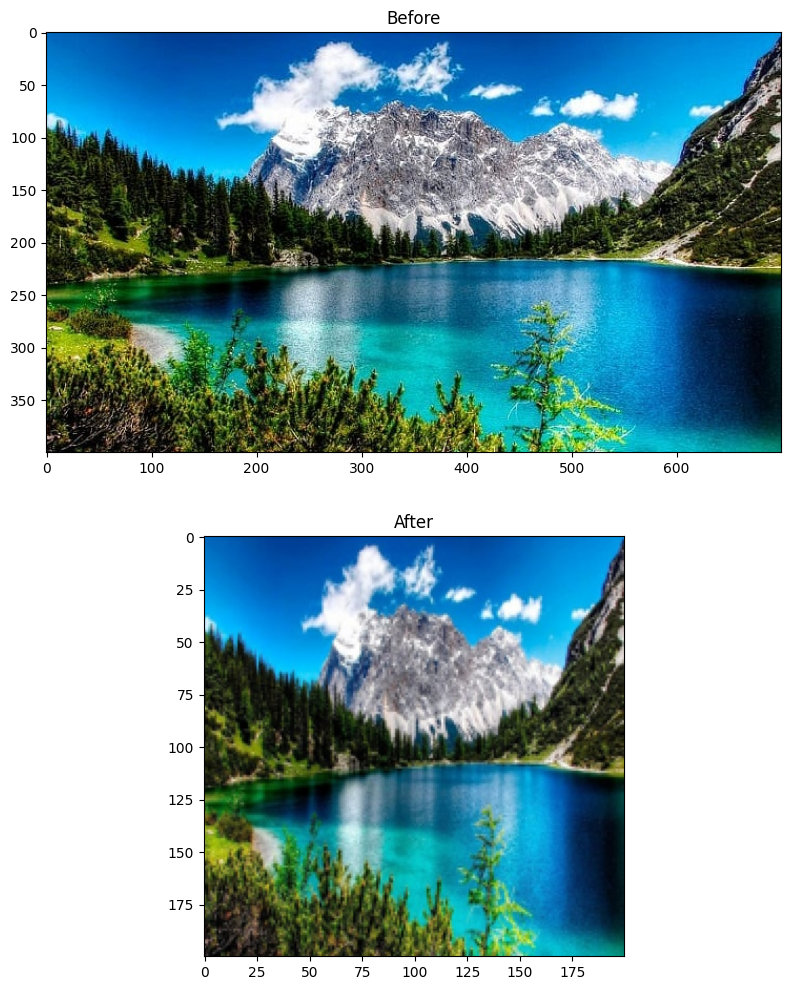

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


<ipython-input-11-7d254277b796>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_img.thumbnail(target_size, Image.ANTIALIAS)


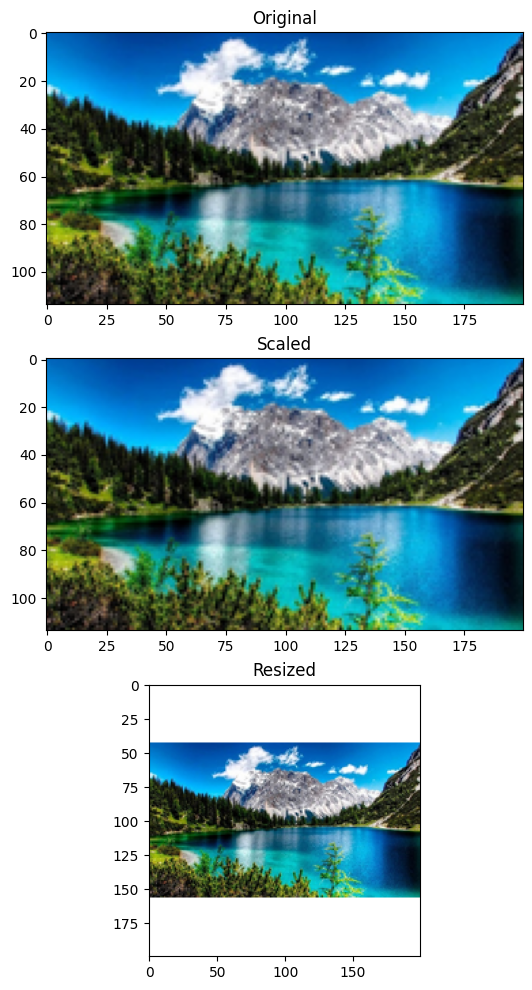

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

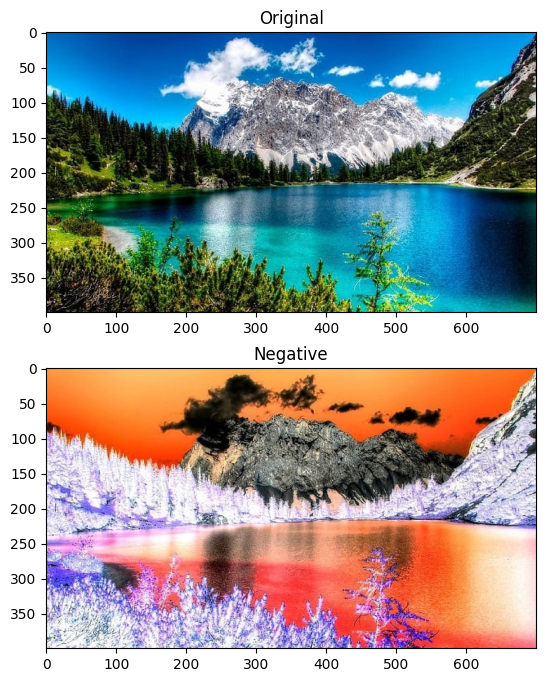

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

<ipython-input-14-73928b64491c>:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

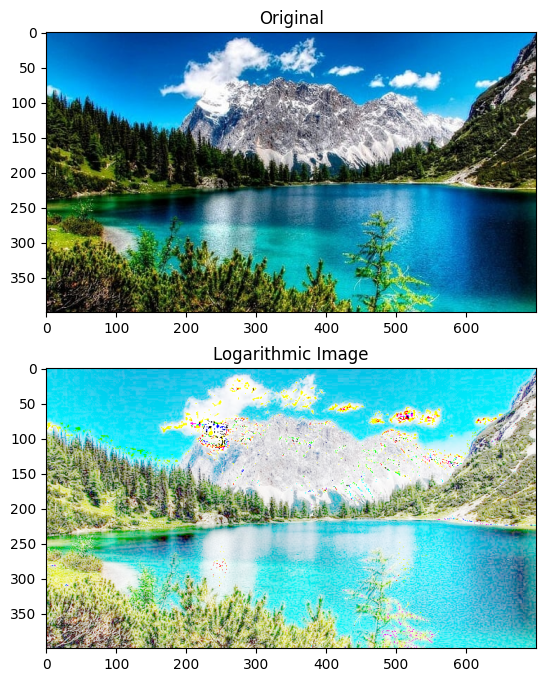

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

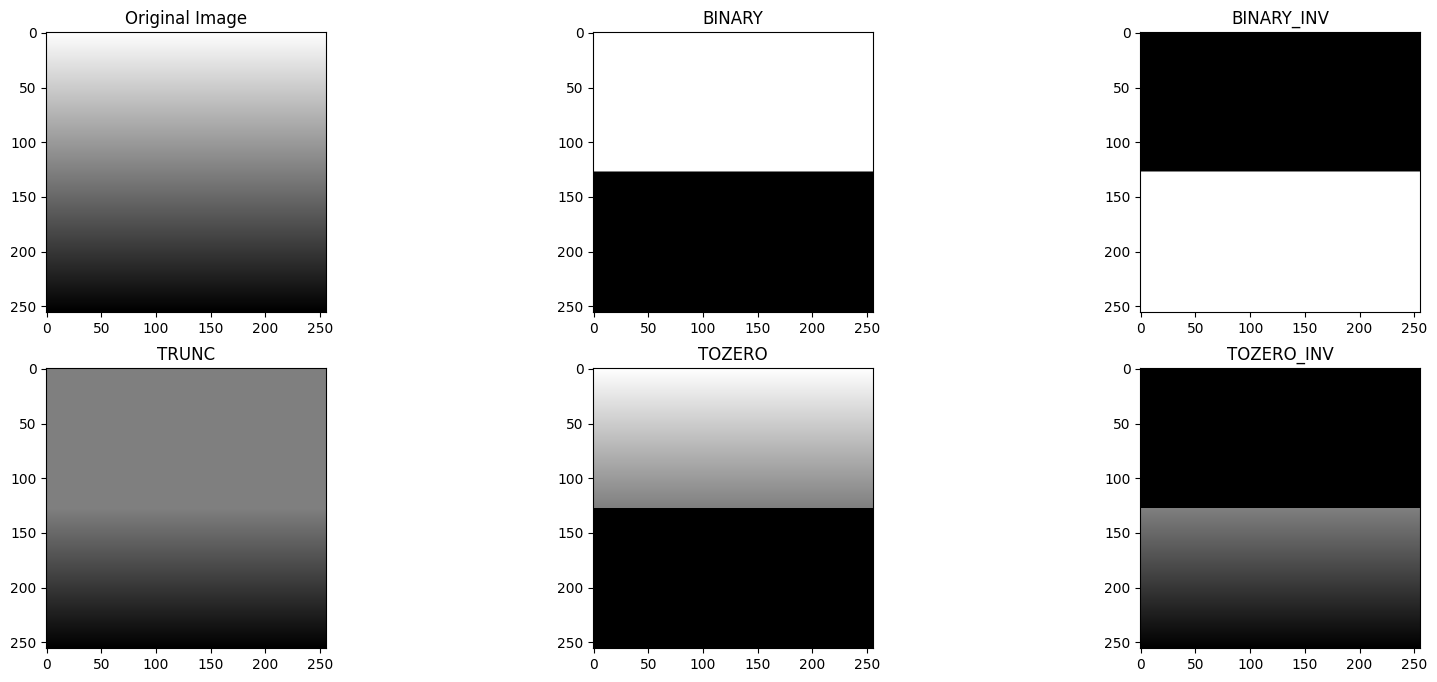

In [ ]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

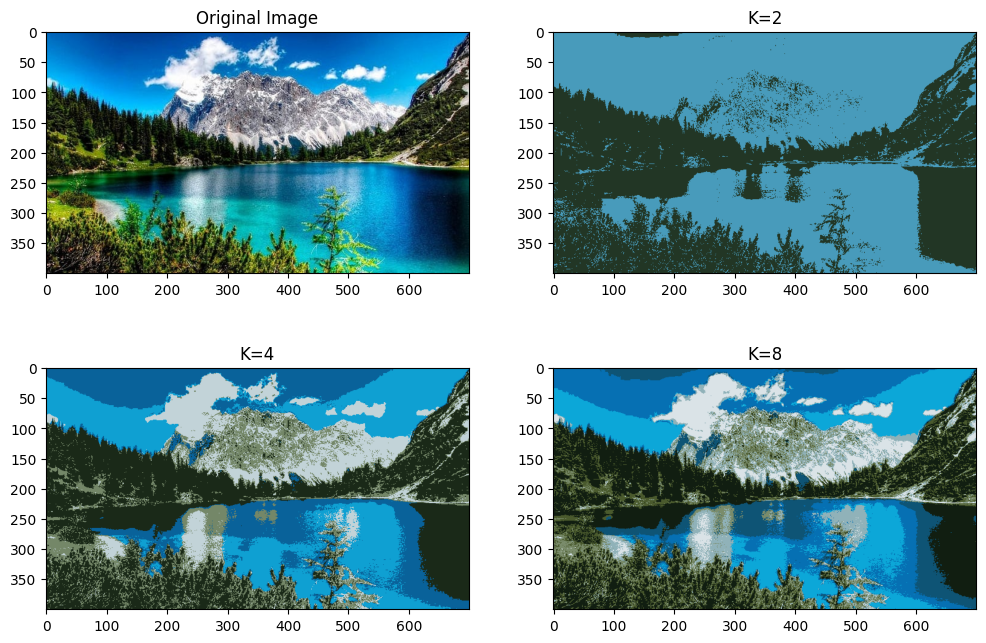

In [ ]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

## Objetivo  <a class="anchor" id="obj"></a>

En esta sesión profundizaremos en el estudio de las técnicas de mejoramiento de imágenes píxel a píxel usando ecualización de histogramas, abordando técnicas complementarias al uso de  histogramas globales, tales como el uso de  ventanas deslizantes o mosaicos. Además, discutiremos las métricas usadas para comparar diferentes métodos de mejoramiento de imágenes.  Los temas discutidos de forma teórica serán abordados aquí de forma practica usando Google Collab.



## Instrucciones  <a class="anchor" id="instr"></a>

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.
2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.
3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.
4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.



## Desarrollo  <a class="anchor" id="desarr"></a>

### Ejercicio 1
En este ejercicio haremos transformaciones pixel a pixel para aumentar la cantidad de imagenes de un dataset para IA. A este proceso se le conoce como Image Data Augmentation.

El aumento de datos de imágenes es el proceso de generar nuevas versiones transformadas de imágenes a partir de un conjunto de datos de imágenes determinado para aumentar su diversidad.

Para una computadora, las imágenes son solo una matriz bidimensional de números. Estos números representan valores de píxeles, que puede modificar de muchas maneras para generar imágenes nuevas y aumentadas. Estas imágenes aumentadas se parecen a las que ya están presentes en el conjunto de datos original, pero contienen más información para una mejor generalización del algoritmo de aprendizaje automático.

El aumento de datos de imágenes ahorra varias horas-persona que de otro modo se dedicarían a intentar crear el conjunto de datos perfecto. Le permite mejorar el rendimiento de su modelo utilizando su conjunto de datos existente protegiéndolo del sobreajuste [1].

[1] Sajid, H. (19 de Juilio, 2022). Picsellia. What Is Image Data Augmentation?. Recuperado en línea el 16 de Enero de 2024 a través de: https://www.picsellia.com/post/image-data-augmentation

Para comenzar, introduciremos la técnica de Rotación: Que dicha operación solo consiste en rotar la imagen para generar nuevos ángulos.

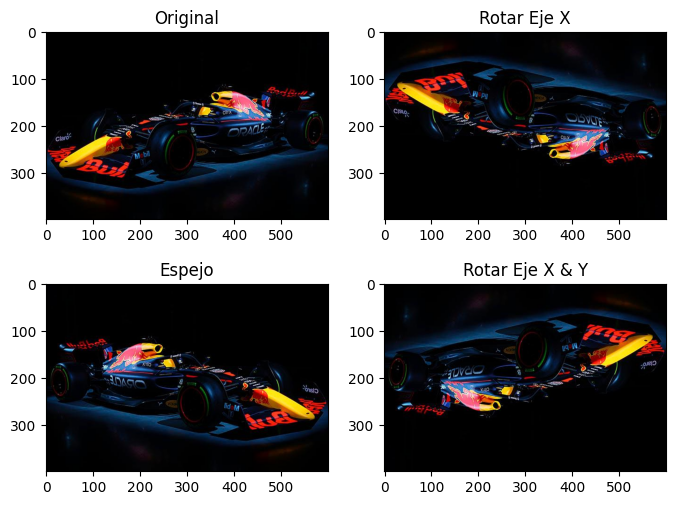

In [ ]:
# Rotación
car_img = cv2.imread('data/car.jpeg')
car_img = cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8, 6))

# Rotamos en eje horizontal
flip0 = cv2.flip(car_img,0)

# Rotamos en su mismo eje vertical
flip1 = cv2.flip(car_img,1)

# Rotamos en ambos ejes
flip2 = cv2.flip(car_img,-1)

# Subplot for original image
a=fig.add_subplot(2,2,1)
imgplot = plt.imshow(car_img)
a.set_title('Original')

a = fig.add_subplot(2,2,3)
imgplot = plt.imshow(flip1)
a.set_title('Espejo')

a = fig.add_subplot(2,2,2)
imgplot = plt.imshow(flip0)
a.set_title('Rotar Eje X')

a = fig.add_subplot(2,2,4)
imgplot = plt.imshow(flip2)
a.set_title('Rotar Eje X & Y')

plt.show()


Ahora demostraremos la técnica de Blur: Las imágenes se pueden difuminar usando diferentes configuraciones del kernel dependiendo de la cantidad de desenfoque requerida. Blur nos permite generar imágenes con distintos niveles de enfoque y calidad de imagen degradada.

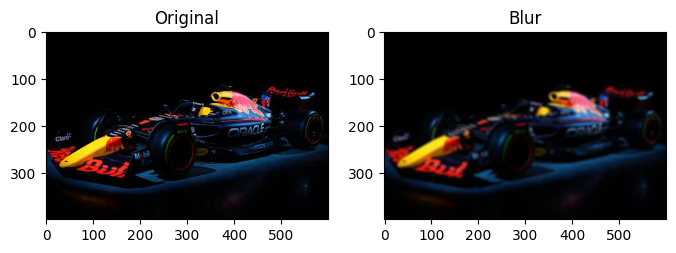

In [ ]:
# Blur
car_img = cv2.imread('data/car.jpeg')
car_img = cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8, 6))

# Definimos el tamaño de Kernel ksize
ksize = (7, 7)

# Using cv2.blur() method
new_car = cv2.blur(car_img, ksize)

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(car_img)
a.set_title('Original')

a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(new_car)
a.set_title('Blur')

plt.show()


Finalmente usaremos la técnica de Random cropping: Recorte aleatoriamente fragmentos de una imagen, lo que permite que el modelo aprenda de datos no perfectos, lo que se adapta mejor a situaciones del mundo real.

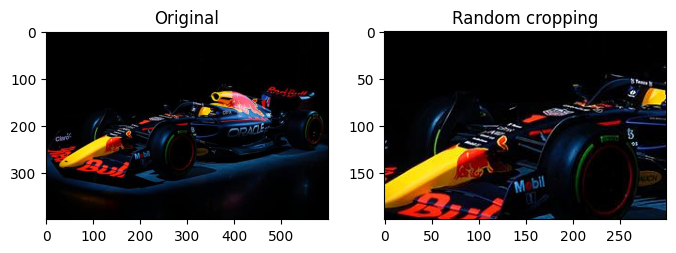

In [ ]:
# Random cropping
car_img = cv2.imread('data/car.jpeg')
car_img = cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8, 6))

# Cropping an image
cropped_image = car_img[100:300, 50:350]

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(car_img)
a.set_title('Original')

a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(cropped_image)
a.set_title('Random cropping')

plt.show()

### Ejercicio 2

La inversion de imagenes es considerada una operacion de pixel, es decir, la operacion necesaria se aplica pixel por pixel y no depende de ningun valor de pixeles vecinos para el calculo del nuevo pixel resultante, en la cual se altera por un lado el valor del pixel en sentido contrario (a traves de la multiplicacion del valor del pixel por -1) mientras que por el otro lado se añade un valor constante de intensidad (255), de tal forma que el resultado quede dentro del intervalo de valores permitidos para la imagen:

pixel_invertido = 255 – pixel_original

Para fines prácticos del ejercicio, realizaremos la operación sobre una imagen que se encuentra en escala de grises.
Dicha imagen es de la radiografía de una rodilla, la cual originalmente proviene del dispositivo de captura con un fondo negro, siendo pixeles más blancos los que generan contraste. El método de negativo o inversión es utilizado para contrastar en una imagen detalles que pueden pasar por desapercibidos a simple vista con una combinación de colores o escala de grises tradicional. Como podemos observar en los resultados, al transformar la imagen notamos partes que no se notaban en la imagen original, como lo son ciertos detalles en los huesos. Esto tiene aplicación en muchas áreas, pero en especial ponemos el ejemplo dentro del área médica.

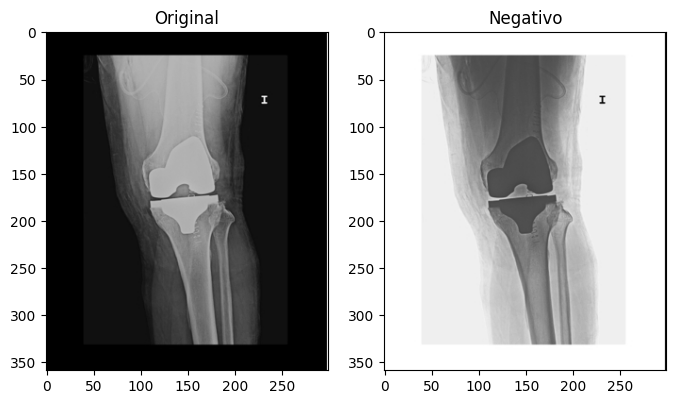

In [ ]:
# Negativo de imagen
rodilla_img = cv2.imread('data/rodilla.jpg', cv2.IMREAD_GRAYSCALE)
rodilla_img = cv2.cvtColor(rodilla_img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(8, 6))

# Calculando el negativo
negativo_img = np.invert(rodilla_img)

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(rodilla_img)
a.set_title('Original')

a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(negativo_img)
a.set_title('Negativo')

plt.show()

### Ejercicio 3


En este ejercicio, aplicaremos una corrección gamma para ajustar el brillo y contraste de las imágenes, mejorando su calidad mediante una adaptación no lineal aplicada a cada valor de píxel.

La corrección gamma se define mediante un factor que puede ser cualquier valor entre 0 e infinito. Los efectos de la corrección gamma son los siguientes:

1. Cuando gamma es menor que 1, la asignación se pondera hacia valores de salida más altos (más claros).
2. Cuando gamma es mayor que 1, la asignación se pondera hacia valores de salida más bajos (más oscuros).

Cuando gamma es exactamente 1, la asignación es lineal.
Esta técnica se utiliza comúnmente para:

1. Mejora del Contraste en Bajas Luces: Permite resaltar detalles en áreas de sombra y mejorar el contraste en regiones oscuras de la imagen.

2. Consistencia en la Reproducción de Imágenes: Asegura que la representación visual sea coherente en diferentes dispositivos y entornos, manteniendo la fidelidad de la imagen.

3. Compensación en la Captura y Procesamiento de Imágenes: Se aplica para corregir no linealidades en la captura y procesamiento de imágenes, garantizando la calidad visual de las imágenes resultantes.

La elección del valor de gamma depende del efecto deseado, ya sea resaltar detalles en sombras, ajustar el contraste general o garantizar la consistencia visual en diversas plataformas. La corrección gamma es una herramienta esencial en el procesamiento de imágenes y contribuye significativamente a la mejora estética y perceptual de las imágenes.




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

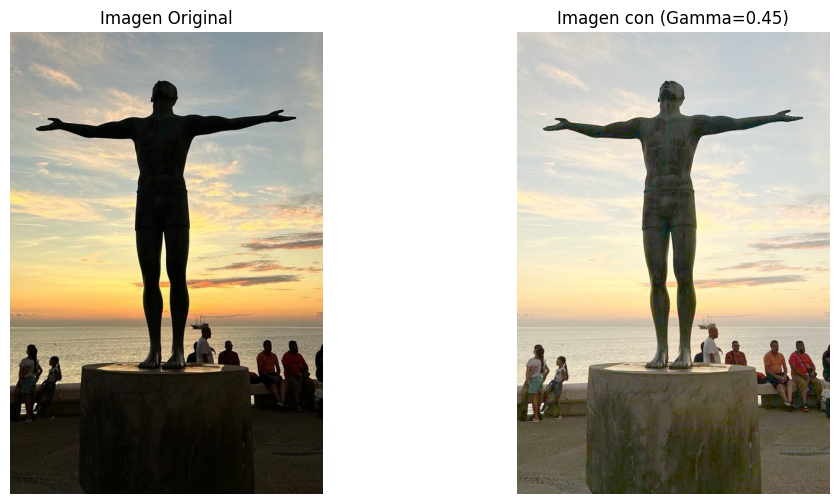

In [ ]:
# Cargar la imagen
img_path = 'data/estatua.jpeg'
img = cv2.imread(img_path)

# Convertir la imagen de BGR a RGB (matplotlib utiliza RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parámetro de corrección gamma
gamma = .45

# Aplicar parametro gamma
gamma_corrected = np.power(img_rgb / 255.0, gamma) * 255.0
gamma_corrected = gamma_corrected.astype(np.uint8)

# Visualizar la imagen original y la corregida
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(gamma_corrected)
axes[1].set_title(f'Imagen con (Gamma={gamma})')
axes[1].axis('off')

plt.show()

En esta primera corrección, hemos aplicado la corrección gamma a una imagen de una estatua donde los detalles son difíciles de apreciar. El objetivo es mejorar el contraste y "aclarar" la imagen para resaltar los detalles. Para lograr este efecto, seleccionamos un valor de gamma menor a 1, mediante un proceso de prueba y error, con el fin de ajustar la asignación de intensidades hacia valores más altos (más claros).

Posteriormente, realizaremos una prueba similar con otra imagen obtenida de internet. Esta imagen presenta una aparente sombra en el objeto principal (flor) y un fondo muy oscuro, lo que dificulta distinguir los detalles del fonfo. La aplicación de la corrección gamma nos permitirá explorar cómo este ajuste no lineal puede mejorar la visibilidad de los elementos en condiciones de iluminación desfavorables.

Estos ejercicios nos proporcionarán una comprensión práctica de cómo la corrección gamma puede ser una herramienta efectiva para adaptar la representación visual de las imágenes y resaltar detalles importantes.

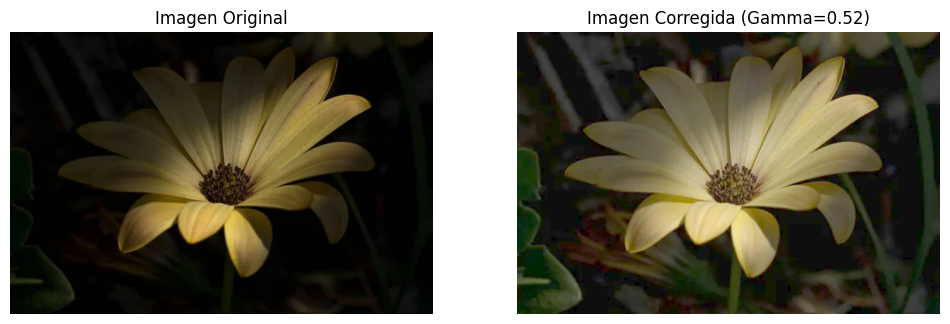

In [ ]:
# Ruta a tu imagen
img_path2 = 'data/flower2.jpg'

# Cargar la imagen
img2 = cv2.imread(img_path2)

# Convertir la imagen de BGR a RGB (matplotlib utiliza RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Parámetro de corrección gamma
gamma = .52

# Aplicar la corrección gamma
gamma_corrected = np.power(img_rgb2 / 255.0, gamma) * 255.0
gamma_corrected = gamma_corrected.astype(np.uint8)

# Visualizar la imagen original y la corregida
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb2)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(gamma_corrected)
axes[1].set_title(f'Imagen Corregida (Gamma={gamma})')
axes[1].axis('off')

plt.show()


### Ejercicio 4

En este último ejercicio, empleamos la técnica de sustracción de imágenes, donde el operador de resta de píxeles toma dos imágenes como entrada y produce una tercera imagen cuyos valores de píxeles son simplemente la diferencia entre los valores de píxeles correspondientes de la primera imagen y los de la segunda imagen. Algunas de las principales aplicaciones están relacionadas con mejorar la calidad de las imágenes, como:

1. Deteccion de movimiento o cambios entre dos imagenes.
2. Reducir la presencia de estructuras no deseadas que puedan interferir con la interpretación.
3. Mejora de Imágenes al restar una versión suavizada de una imagen original puede resaltar los detalles finos.

La sustracción de imágenes demuestra ser una herramienta versátil que se adapta a diversas aplicaciones en visión por computadora y análisis de imágenes. Su capacidad para resaltar cambios y mejorar la interpretación visual la convierte en una técnica valiosa en el procesamiento de imágenes y en escenarios donde se buscan mejoras significativas en la información capturada.

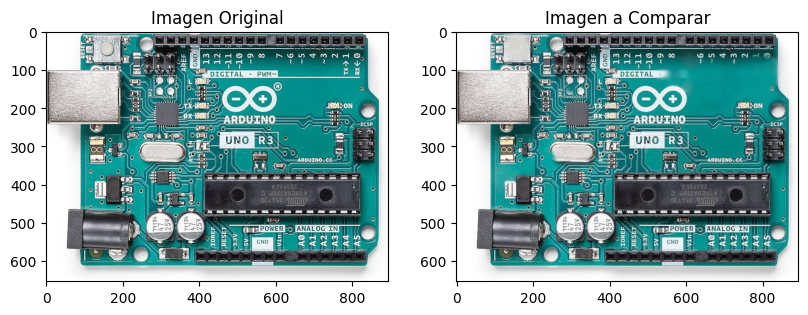

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar dos imágenes
img1 = cv2.imread('data/ar1.jpg')
img2 = cv2.imread('data/ar2.jpeg')

# Redimensionar imágenes si es necesario
height, width, _ = img1.shape
img2 = cv2.resize(img2, (width, height))

# Sustracción en escala de grises
diff_gray = cv2.absdiff(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY))

# Sustracción en color
diff_color = cv2.absdiff(img1, img2)

# Visualizar las imágenes originales y las sustracciones
plt.figure(figsize=(15, 8))

plt.subplot(231), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(232), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Imagen a Comparar')


plt.show()

En este caso quisimos simular una deteccion de defectos por lo que a la imagen de un arduino eliminamos algumos componentes mediante la edicion (como puede apreciarse en al segunda imagen) para posteriormente compararlas entre si.

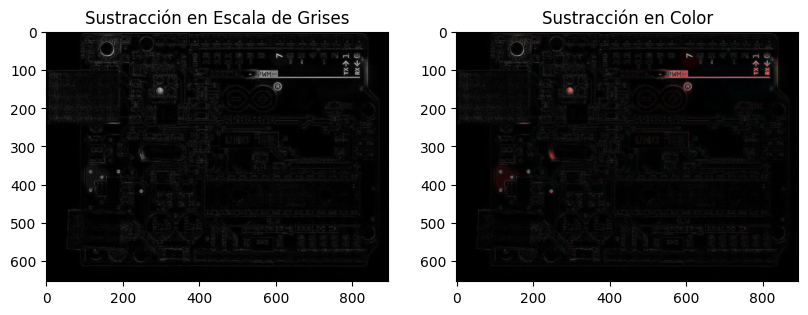

In [ ]:
#Deteccion de diferencias
plt.figure(figsize=(15, 8))

plt.subplot(231), plt.imshow(diff_gray, cmap='gray'), plt.title('Sustracción en Escala de Grises')
plt.subplot(232), plt.imshow(cv2.cvtColor(diff_color, cv2.COLOR_BGR2RGB)), plt.title('Sustracción en Color')


plt.show()

El resaltado en rojo proporciona una indicación visual clara de las áreas que difieren entre las imágenes, lo que simplifica la interpretación y el análisis de los cambios realizados. Este enfoque es especialmente útil cuando para encontrar defectos o tambien cuando se trabaja con imágenes antes y después de ciertas ediciones o modificaciones.

- - -
***Bibliografía:***

*  Alard, C., & Lupton, R. H. (1998). A Method for Optimal Image Subtraction. The Astrophysical Journal, 503(1), 325-331. https://doi.org/10.1086/305984
* Rosebrock, A. (2021, January 19). Image Arithmetic OpenCV. PyImageSearch. https://pyimagesearch.com/2021/01/19/image-arithmetic-opencv/
* Farid, H. (2001). Blind Inverse Gamma Correction. IEEE Transactions on Image Processing, 10(10), https://doi.org/10.1109/83.951529
* Rosebrock, A. (2015, October 5). OpenCV gamma correction. PyImageSearch. https://pyimagesearch.com/2015/10/05/opencv-gamma-correction/#:~:text=There%20are%20two%20(easy)%20ways,range%20%5B0%2C%20255%5D
* Pixel Subtraction. (n.d.). Retrieved January 21, 2024, from https://homepages.inf.ed.ac.uk/rbf/HIPR2/pixsub.htm
* MathWorks. (n.d.). Corrección gamma. Retrieved January 21, 2024, from https://la.mathworks.com/help/images/gamma-correction.html


